In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv")
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. size of the data

In [2]:
df.size

9801

In [3]:
df.shape

(891, 11)

In [4]:
df.memory_usage(deep=True)

Index         132
survived     7128
pclass       7128
name        74813
sex         54979
age          7128
sibsp        7128
parch        7128
ticket      56802
fare         7128
cabin       34344
embarked    51626
dtype: int64

# 2. How does the data look

In [5]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.sample(5) # % random samples

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
714,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
359,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
790,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
659,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
658,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S


# 3. Datatype of columns

In [8]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 4. How does the data look mathematically

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# 5. Check missing values

In [11]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

# 6. Check duplicate values

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df[df.duplicated() == True]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


# 7. Check unique values

In [15]:
df.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [16]:
corr_mat = df.corr()
corr_mat

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/2851270020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

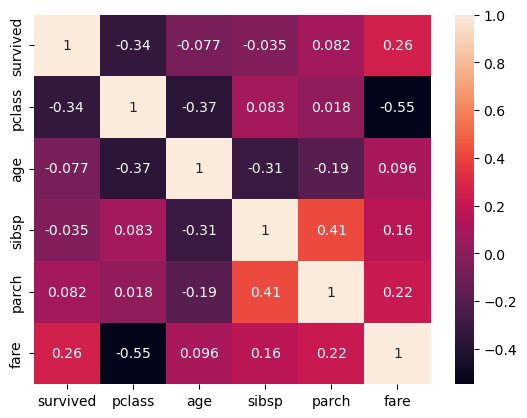

In [17]:
import seaborn as sns
sns.heatmap(corr_mat,annot=True)

Types of analyses :
   1. Univariate Analysis
   2. Bivariate Analysis
   3. Multivariate Analysis


# Univariate Analysis

In [18]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [20]:
df['ticket'].dtypes

dtype('O')

We check different things with respect to a single column

Types of variables :
   1. Categorical
   2. Numeric

In [21]:
categorical_features=[column for column in df.columns if df[column].dtype == 'O']
categorical_features

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [22]:
numerical_features = [column for column in df.columns if df[column].dtype != 'O']
numerical_features

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [23]:
df[categorical_features]

,name,sex,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [24]:
df[numerical_features]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


# Univariate Analysis on Categorical Features

## 1. Countplot

<Axes: xlabel='embarked', ylabel='count'>

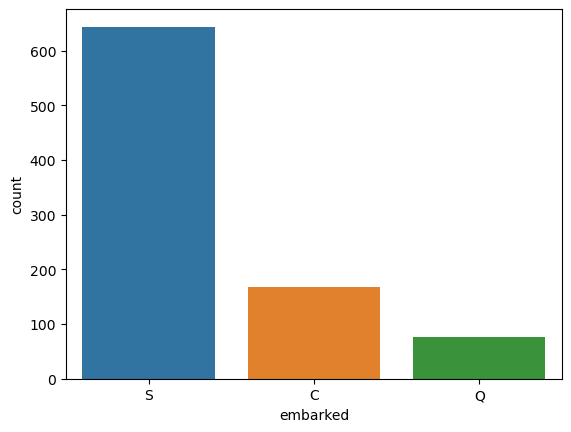

In [25]:
sns.countplot(data=df,x='embarked')

1. Most of the people boarded Titanic from location 'S'.
2. Least of the people boarded Titanic from location 'Q'.

<Axes: xlabel='sex', ylabel='count'>

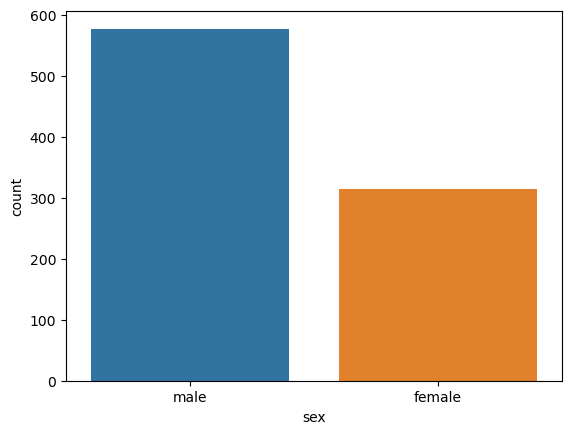

In [26]:
sns.countplot(df,x='sex')

1. there are more males than females.

<Axes: xlabel='pclass', ylabel='count'>

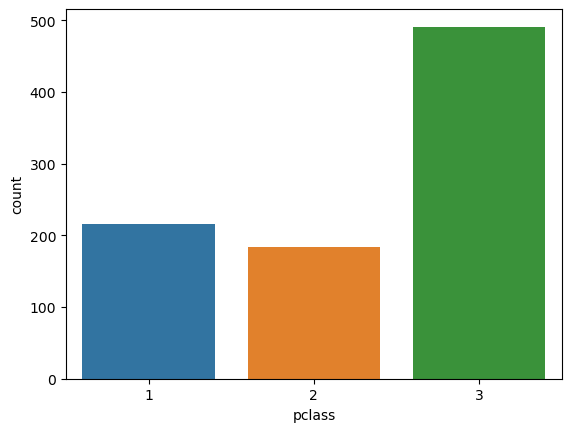

In [27]:
sns.countplot(df,x='pclass')

1. Most of the people were in class 3.
2. Least of the people were in class 2.

In [28]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: >

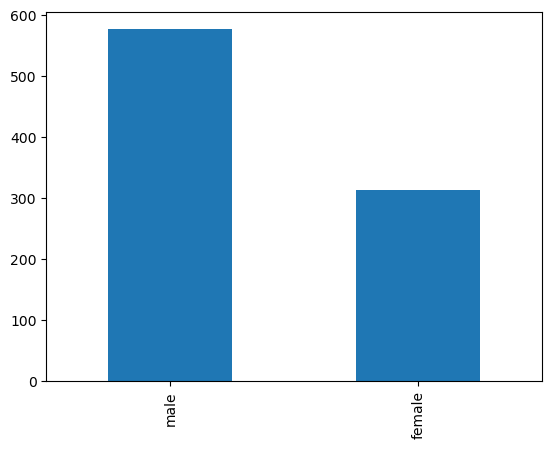

In [29]:
df['sex'].value_counts().plot(kind='bar')

In [30]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [31]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

## 2. Piechart

<Axes: ylabel='sex'>

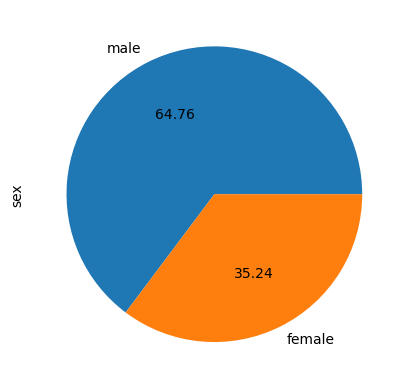

In [32]:
df['sex'].value_counts().plot(kind='pie',autopct = '%.2f')

<Axes: ylabel='pclass'>

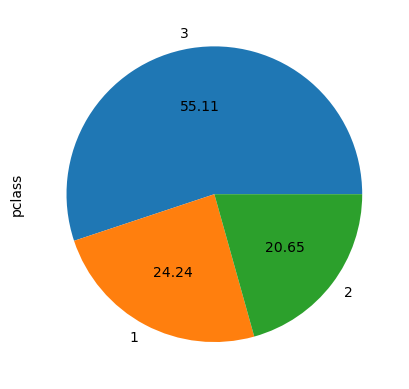

In [33]:
df['pclass'].value_counts().plot(kind='pie',autopct = '%.2f')

# Univariate Analysis on Numerical Features

## 1. Histogram

In [34]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

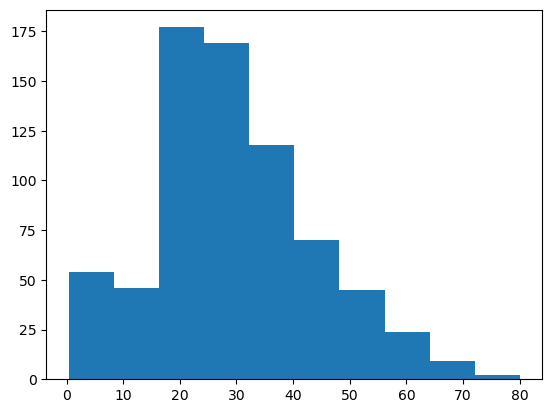

In [35]:
plt.hist(df['age'])

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/3732141902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=True)


<Axes: xlabel='age', ylabel='Density'>

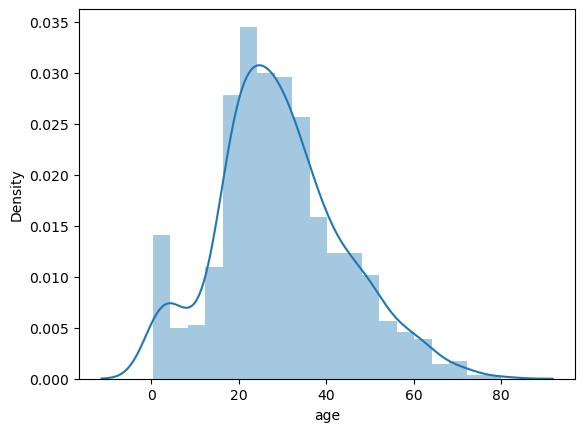

In [36]:
sns.distplot(df['age'],kde=True)

## 2. Boxplot

<Axes: >

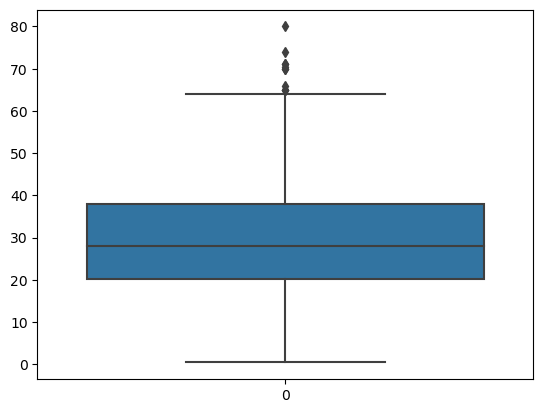

In [37]:
sns.boxplot(df['age'])

In [38]:
df['age'].min()

0.42

In [39]:
min(df.age)

0.42

In [40]:
df['age'].max()

80.0

In [41]:
df['age'].median()

28.0

In [42]:
df['age'].skew()

0.38910778230082704

In [43]:
df['age'].skew()*100

38.910778230082705

38.91% of the data is skewed

In [44]:
(1-df['age'].skew())*100

61.08922176991729

61.08% of the data is not skewed (follows normal distribution)

# Bivariate Analysis

#### Multivariate analysis --> Here more than 2 columns are involved.

In [45]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [47]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 1. Scatter Plot -> Both x and y are numerical features

In [48]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

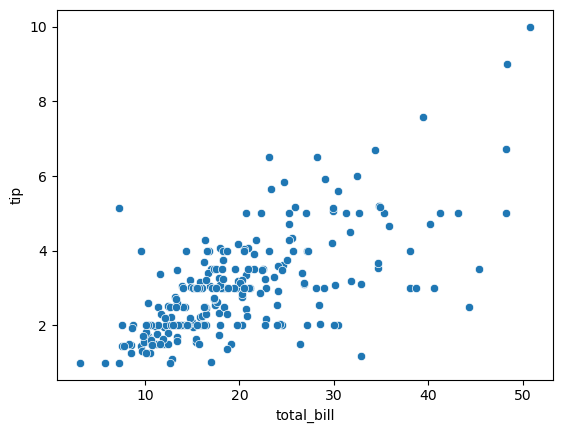

In [49]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip']) # Bivariate analysis

<Axes: xlabel='total_bill', ylabel='tip'>

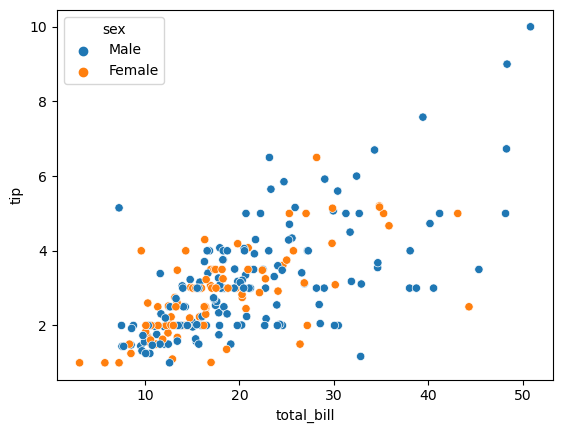

In [50]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex']) # Multivariate analysis

<Axes: xlabel='total_bill', ylabel='tip'>

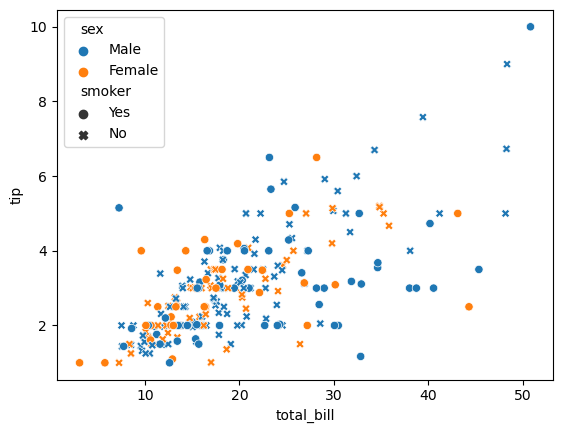

In [51]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker']) # Multivariate analysis

<Axes: xlabel='total_bill', ylabel='tip'>

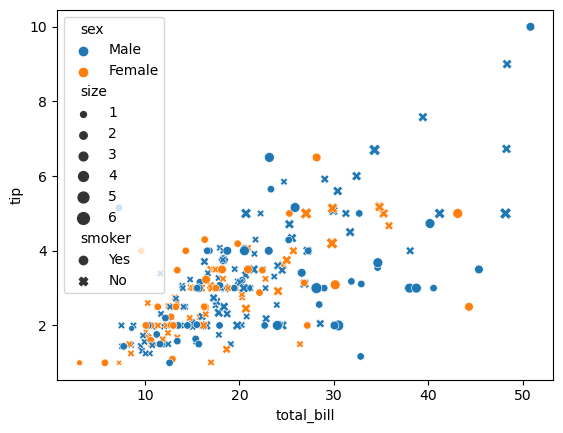

In [52]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size']) # Multivariate analysis

# 2. Bar Plot -> x is numerical feature and y is categorical

In [53]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='pclass', ylabel='age'>

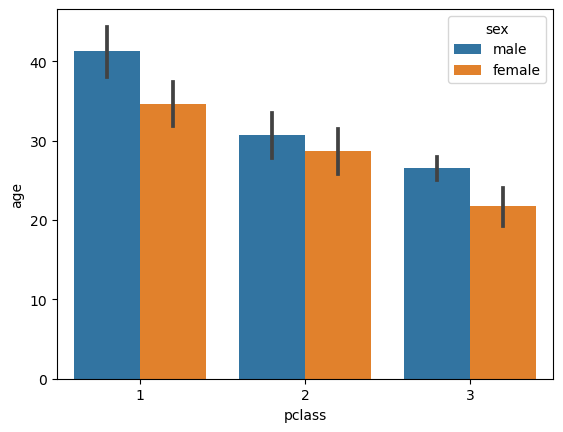

In [54]:
sns.barplot(data=df,x='pclass',y='age',hue='sex')

# 2. Box Plot -> x is numerical feature and y is categorical

<Axes: xlabel='sex', ylabel='age'>

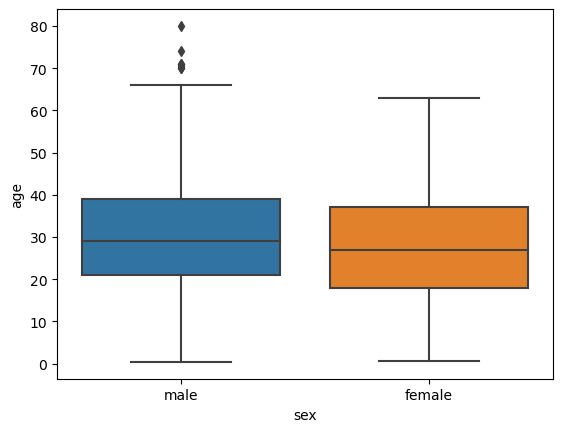

In [55]:
sns.boxplot(data=df,x='sex',y='age')

<Axes: xlabel='sex', ylabel='age'>

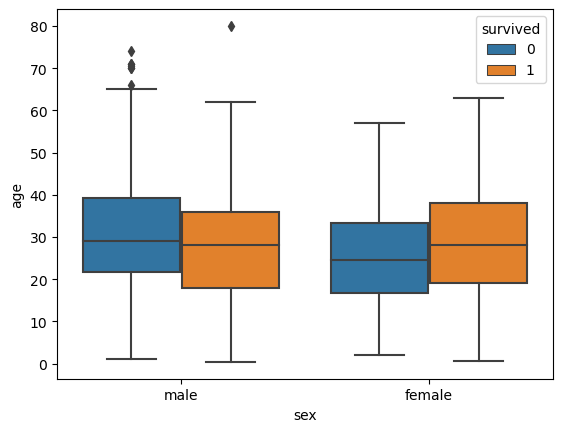

In [56]:
sns.boxplot(data=df,x='sex',y='age',hue='survived')

In [57]:
df[df['survived']==0]['age']

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: age, Length: 549, dtype: float64

In [58]:
df[df['survived']==0]['age'].min()

1.0

In [59]:
df[df['survived']==0]['age'].max()

74.0

In [60]:
df[df['survived']==1]['age'].min()

0.42

In [61]:
df[df['survived']==1]['age'].max()

80.0

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/3829164132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==0]['age'],kde=True)


<Axes: xlabel='age', ylabel='Density'>

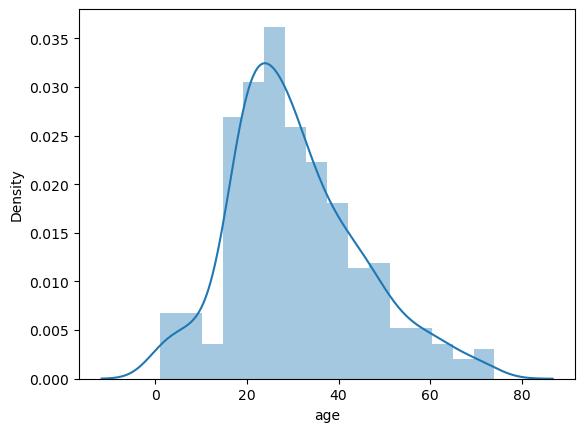

In [62]:
sns.distplot(df[df['survived']==0]['age'],kde=True)

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/310173507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==0]['age'],kde=True,hist=False)


<Axes: xlabel='age', ylabel='Density'>

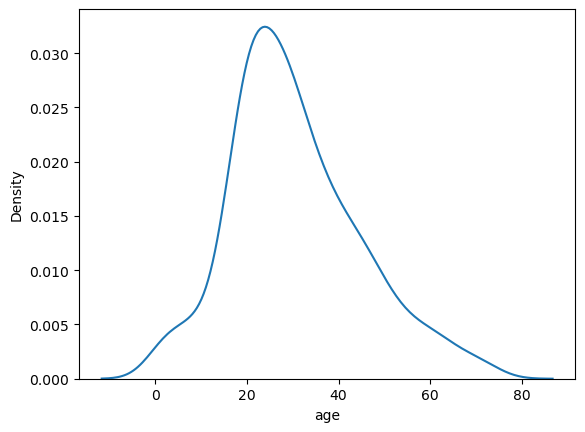

In [63]:
sns.distplot(df[df['survived']==0]['age'],kde=True,hist=False)

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/1141562687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['survived']==0]['age'],kde=True,hist=False)
/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/1141562687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

<Axes: xlabel='age', ylabel='Density'>

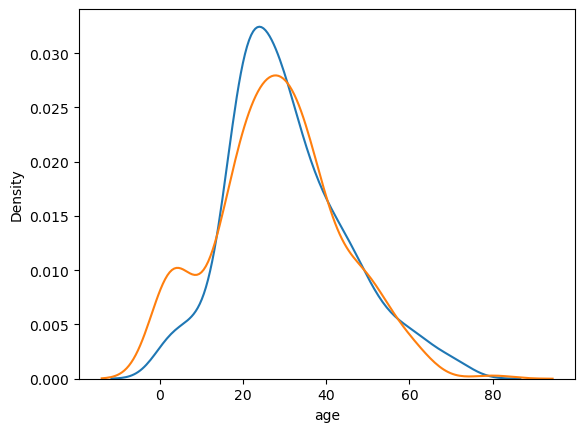

In [64]:
sns.distplot(df[df['survived']==0]['age'],kde=True,hist=False)
sns.distplot(df[df['survived']==1]['age'],kde=True,hist=False)

# 3. Heatmap -> x is categorical feature and y is categorical

In [65]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [67]:
df.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [68]:
pd.crosstab(df['pclass'],df['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='survived', ylabel='pclass'>

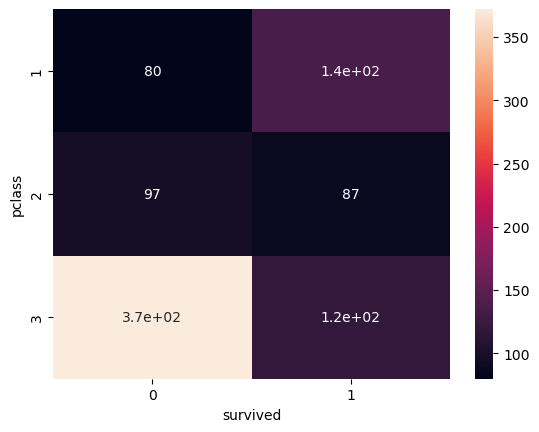

In [69]:
sns.heatmap(pd.crosstab(df['pclass'],df['survived']),annot=True)

# 4. Pairplot

In [70]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


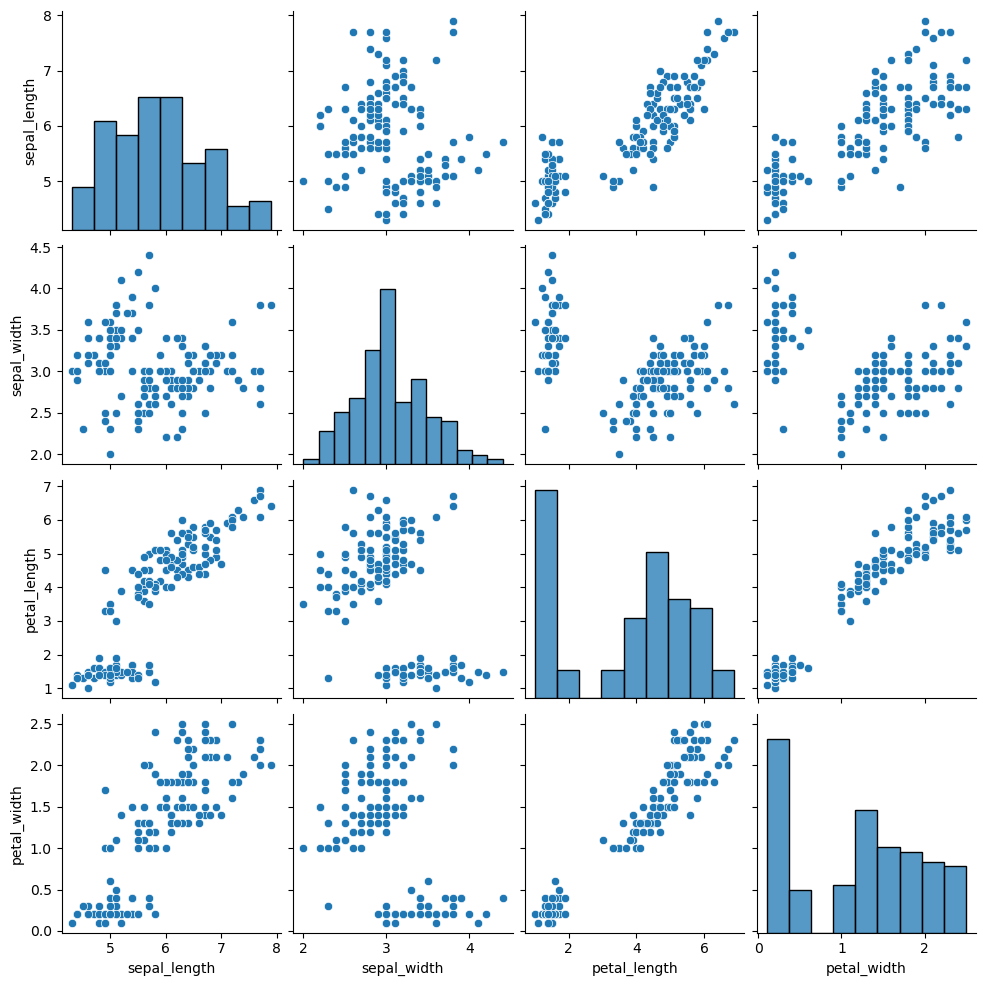

In [71]:
sns.pairplot(iris)

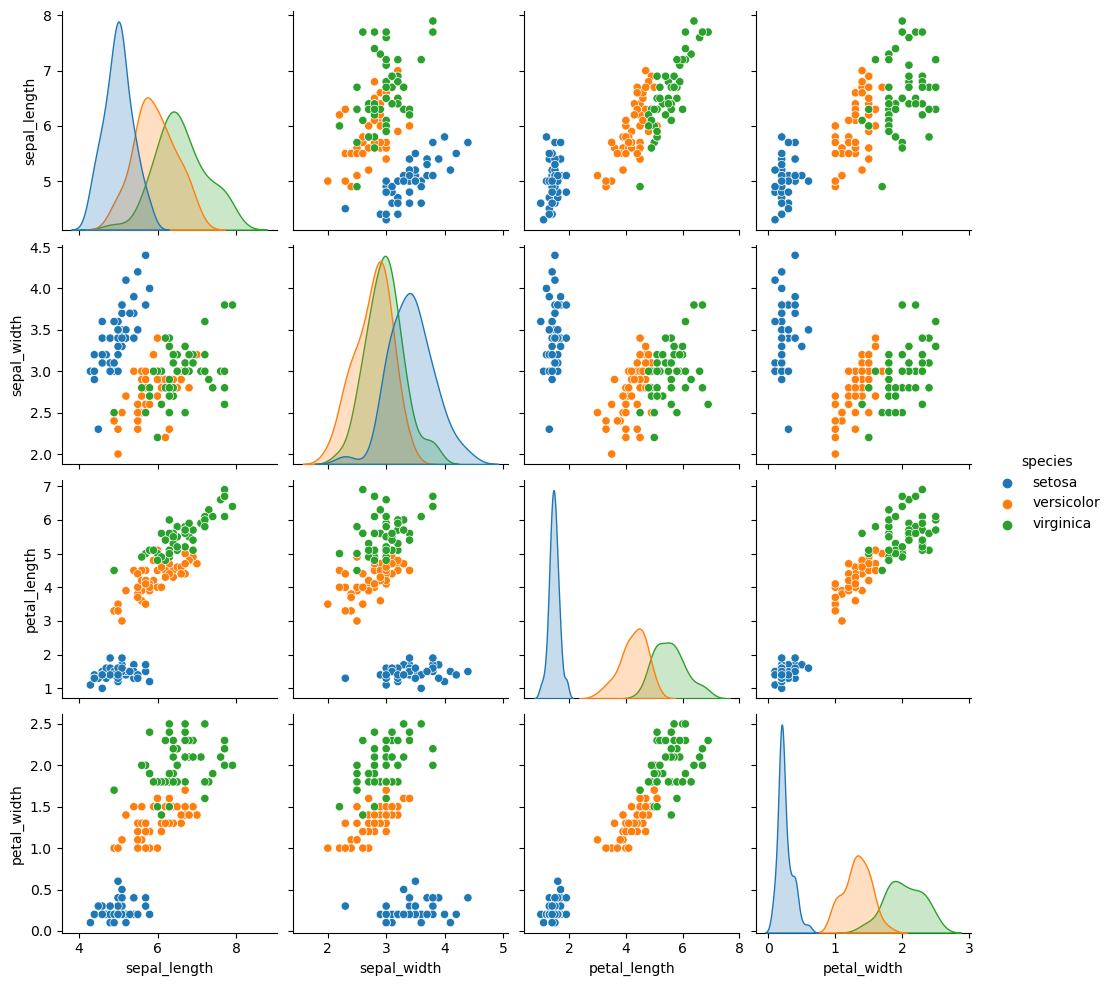

In [72]:
sns.pairplot(iris,hue='species')

# 5. Lineplot (between both numerical features)

<Axes: xlabel='total_bill', ylabel='tip'>

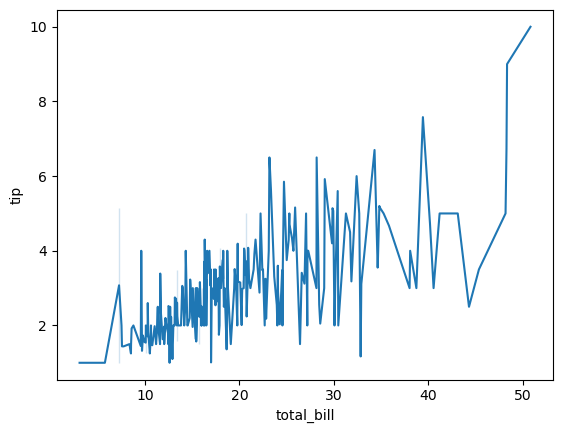

In [73]:
sns.lineplot(x=tips['total_bill'],y=tips['tip']) # we get a lineplot if we connect all the dots of scatter plot

In [74]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='month', ylabel='passengers'>

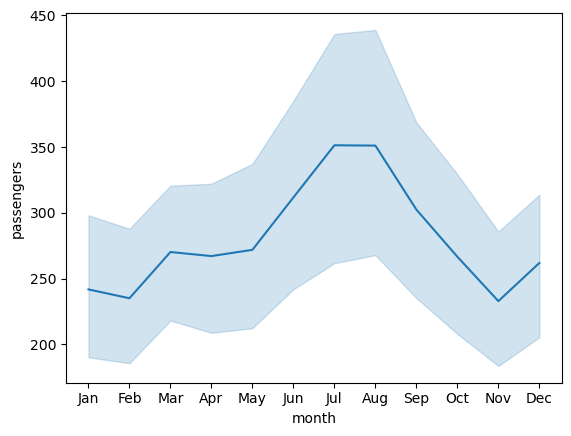

In [75]:
sns.lineplot(flights,x='month',y='passengers')

### whenever we have a time in x axis , we use lineplot

In [76]:
flights.groupby('year').sum()

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/3873016343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby('year').sum()


,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


In [77]:
flights_new = flights.groupby('year').sum().reset_index()
flights_new

/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/2762353284.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_new = flights.groupby('year').sum().reset_index()


,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

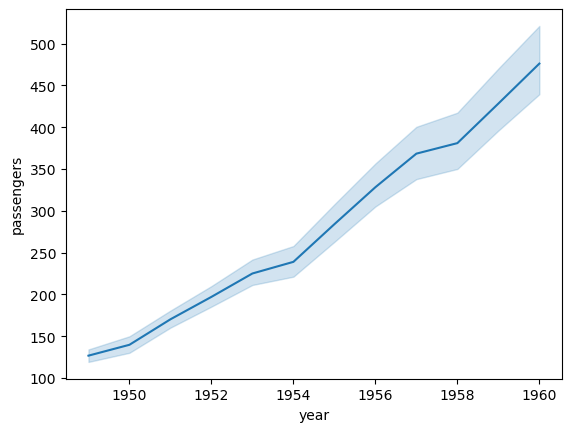

In [78]:
sns.lineplot(flights,x='year',y='passengers')

## Pivot Table

In [79]:
flights.pivot_table(values='passengers',index='month')

,passengers
month,
Jan,241.750000
Feb,235.000000
Mar,270.166667
Apr,267.083333
May,271.833333
Jun,311.666667
Jul,351.333333
Aug,351.083333
Sep,302.416667


In [80]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

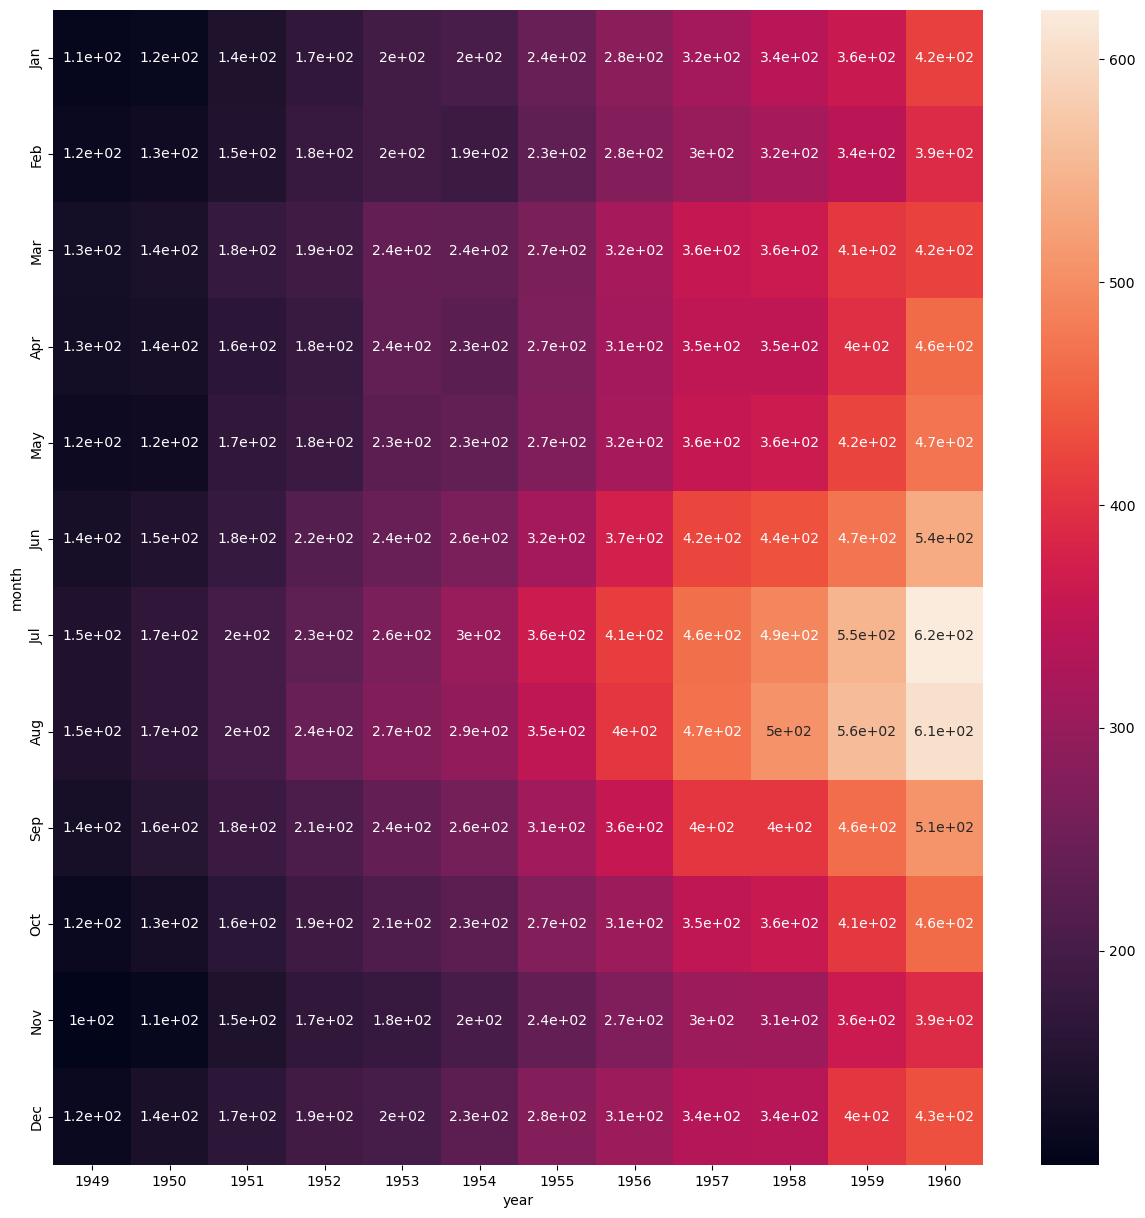

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'),annot=True)

# Pandas Profiling

In [82]:
!pip install pandas-profiling

In [83]:
!pip install equires visions[type_image_path]==0.7.5

zsh:1: no matches found: visions[type_image_path]==0.7.5


In [84]:
from pandas_profiling import ProfileReport

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
/var/folders/31/h661wdqj5pzb01symws5rm_40000gn/T/ipykernel_3013/2274191625.py:1: DeprecationWarning: `import pandas_profili

In [85]:
profile=ProfileReport(df,title="Pandas Profiling Report")

In [86]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]